# Monte Carlo Dice Simulator - Demonstration Scenarios

This notebook demonstrates the capabilities of the Monte Carlo dice simulation package through three comprehensive scenarios. Each scenario showcases different aspects of probability theory and statistical analysis using the `Die`, `Game`, and `Analyzer` classes.

The simulations explore:
- **Fair vs. Unfair Dice**: How weighted dice affect probability distributions
- **Jackpot Analysis**: Statistical patterns in multi-die games
- **Real-world Applications**: Using letter frequencies to generate English words

Run each cell sequentially to see the Monte Carlo simulation in action.

In [1]:
# Import required libraries and Monte Carlo simulator components
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from montecarlo.die import Die
from montecarlo.game import Game
from montecarlo.analyzer import Analyzer

# Set up matplotlib for better plots
plt.style.use('default')
plt.rcParams['figure.figsize'] = (10, 6)

## Scenario 1: Fair vs. Unfair Coin Simulation

In this scenario, we'll explore how weighted dice affect probability distributions by comparing fair and unfair coins. This demonstrates the core principles of Monte Carlo simulation and how bias affects outcomes.

### Creating Fair and Unfair Coins

We'll create two types of coins:
- A **fair coin** with equal probability for heads (H) and tails (T)
- An **unfair coin** where heads has 5x the weight of tails

In [2]:
# Create a fair coin with equal weights
fair_coin = Die(np.array(['H', 'T']))
print("Fair coin:")
print(fair_coin.show())

# Create an unfair coin with weighted heads
unfair_coin = Die(np.array(['H', 'T']))
unfair_coin.change_weight('H', 5)  # Heads is 5x more likely
print("\nUnfair coin (H weighted 5x):")
print(unfair_coin.show())

Fair coin:
   weights
H      1.0
T      1.0

Unfair coin (H weighted 5x):
   weights
H      5.0
T      1.0


### Simulation 1: Two Fair Coins

Let's simulate flipping two fair coins 1000 times and analyze the results.

In [3]:
# Play a game with two fair coins
fair_game = Game([fair_coin, fair_coin])
fair_game.play(1000)

# Display the first 10 results
print("First 10 results of fair coin game:")
print(fair_game.show_results('narrow').head(10))

First 10 results of fair coin game:
            Die Number   
                     0  1
Roll Number              
0                    H  H
1                    H  H
2                    T  T
3                    T  H
4                    T  T
5                    H  H
6                    T  H
7                    H  H
8                    H  T
9                    T  H


### Simulation 2: Mixed Fair and Unfair Coins

Now let's simulate a game with two unfair coins and one fair coin to see how bias affects the overall distribution.

In [4]:
# Play a game with two unfair coins and one fair coin
mixed_game = Game([unfair_coin, unfair_coin, fair_coin])
mixed_game.play(1000)

# Display the first 10 results
print("First 10 results of mixed coin game:")
print(mixed_game.show_results('narrow').head(10))

First 10 results of mixed coin game:
            Die Number      
                     0  1  2
Roll Number                 
0                    H  H  T
1                    H  H  T
2                    H  H  T
3                    H  H  T
4                    H  H  T
5                    H  H  T
6                    T  H  H
7                    H  H  H
8                    H  H  T
9                    H  H  T


### Jackpot Analysis

A "jackpot" occurs when all dice show the same face. Let's analyze how often this happens in each scenario and compare the results.

Fair coins - Jackpots: 490, Relative frequency: 0.490
Mixed coins - Jackpots: 383, Relative frequency: 0.383


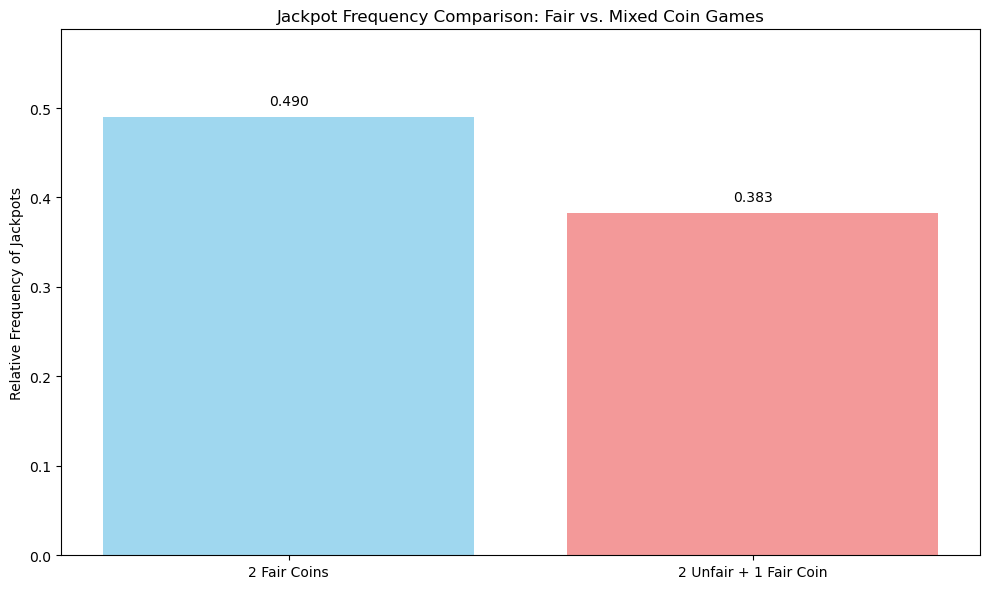


Insight: The unfair coins bias toward heads increases the jackpot frequency by -21.8%


In [5]:
# Analyze jackpots in both games
fair_analyzer = Analyzer(fair_game)
mixed_analyzer = Analyzer(mixed_game)

# Calculate jackpot frequencies
fair_jackpots = fair_analyzer.jackpot()
mixed_jackpots = mixed_analyzer.jackpot()

# Calculate relative frequencies
fair_relative = fair_jackpots / len(fair_game.show_results())
mixed_relative = mixed_jackpots / len(mixed_game.show_results())

print(f"Fair coins - Jackpots: {fair_jackpots}, Relative frequency: {fair_relative:.3f}")
print(f"Mixed coins - Jackpots: {mixed_jackpots}, Relative frequency: {mixed_relative:.3f}")

# Visualize the comparison
plt.figure(figsize=(10, 6))
categories = ['2 Fair Coins', '2 Unfair + 1 Fair Coin']
frequencies = [fair_relative, mixed_relative]

bars = plt.bar(categories, frequencies, color=['skyblue', 'lightcoral'], alpha=0.8)
plt.ylabel('Relative Frequency of Jackpots')
plt.title('Jackpot Frequency Comparison: Fair vs. Mixed Coin Games')
plt.ylim(0, max(frequencies) * 1.2)

# Add value labels on bars
for bar, freq in zip(bars, frequencies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{freq:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

print(f"\nInsight: The unfair coins bias toward heads increases the jackpot frequency by {((mixed_relative/fair_relative - 1) * 100):.1f}%")

## Scenario 2: Six-Sided Dice Simulation

This scenario explores more complex probability distributions using traditional six-sided dice with various weight configurations. We'll see how different biases affect jackpot probabilities in multi-die games.

### Creating Dice with Different Biases

We'll create three types of dice:
- **Fair die**: Equal probability for all faces (1-6)
- **High-biased die**: Face 6 weighted 5x more than others
- **Low-biased die**: Face 1 weighted 5x more than others

In [6]:
# Create three six-sided dice
fair_die = Die(np.array([1, 2, 3, 4, 5, 6]))
high_biased_die = Die(np.array([1, 2, 3, 4, 5, 6]))
low_biased_die = Die(np.array([1, 2, 3, 4, 5, 6]))

# Apply weights
high_biased_die.change_weight(6, 5)  # Face 6 is 5x more likely
low_biased_die.change_weight(1, 5)   # Face 1 is 5x more likely

print("Fair die:")
print(fair_die.show())
print("\nHigh-biased die (6 weighted 5x):")
print(high_biased_die.show())
print("\nLow-biased die (1 weighted 5x):")
print(low_biased_die.show())

Fair die:
   weights
1      1.0
2      1.0
3      1.0
4      1.0
5      1.0
6      1.0

High-biased die (6 weighted 5x):
   weights
1      1.0
2      1.0
3      1.0
4      1.0
5      1.0
6      5.0

Low-biased die (1 weighted 5x):
   weights
1      5.0
2      1.0
3      1.0
4      1.0
5      1.0
6      1.0


### Simulation 1: Five Fair Dice

Let's simulate rolling five fair dice 10,000 times to establish a baseline for jackpot frequency.

In [7]:
# Game with five fair dice
fair_dice_game = Game([fair_die, fair_die, fair_die, fair_die, fair_die])
fair_dice_game.play(10000)

print("Sample results from fair dice game:")
print(fair_dice_game.show_results('narrow').head(10))

Sample results from fair dice game:
            Die Number            
                     0  1  2  3  4
Roll Number                       
0                    2  1  5  4  4
1                    6  4  1  5  2
2                    1  4  6  2  4
3                    4  6  1  1  5
4                    5  4  3  6  5
5                    4  1  6  5  1
6                    6  1  1  6  1
7                    3  2  1  2  6
8                    2  3  6  4  2
9                    1  3  6  2  6


### Simulation 2: Mixed Dice Configuration

Now let's simulate with 2 unfair dice (one high-biased, one low-biased) and 3 fair dice.

In [8]:
# Game with mixed dice: 2 unfair + 3 fair
mixed_dice_game = Game([high_biased_die, low_biased_die, fair_die, fair_die, fair_die])
mixed_dice_game.play(10000)

print("Sample results from mixed dice game:")
print(mixed_dice_game.show_results('narrow').head(10))

Sample results from mixed dice game:
            Die Number            
                     0  1  2  3  4
Roll Number                       
0                    5  1  6  4  1
1                    6  2  2  6  2
2                    6  1  3  5  2
3                    6  1  3  2  2
4                    2  1  5  5  3
5                    3  1  5  3  3
6                    6  5  5  5  5
7                    6  1  6  5  6
8                    2  4  4  6  3
9                    6  4  3  2  6


### Comparative Analysis

Let's analyze and compare the jackpot frequencies between fair and mixed dice configurations.

Fair dice game - Jackpots: 6, Relative frequency: 0.000600
Mixed dice game - Jackpots: 4, Relative frequency: 0.000400


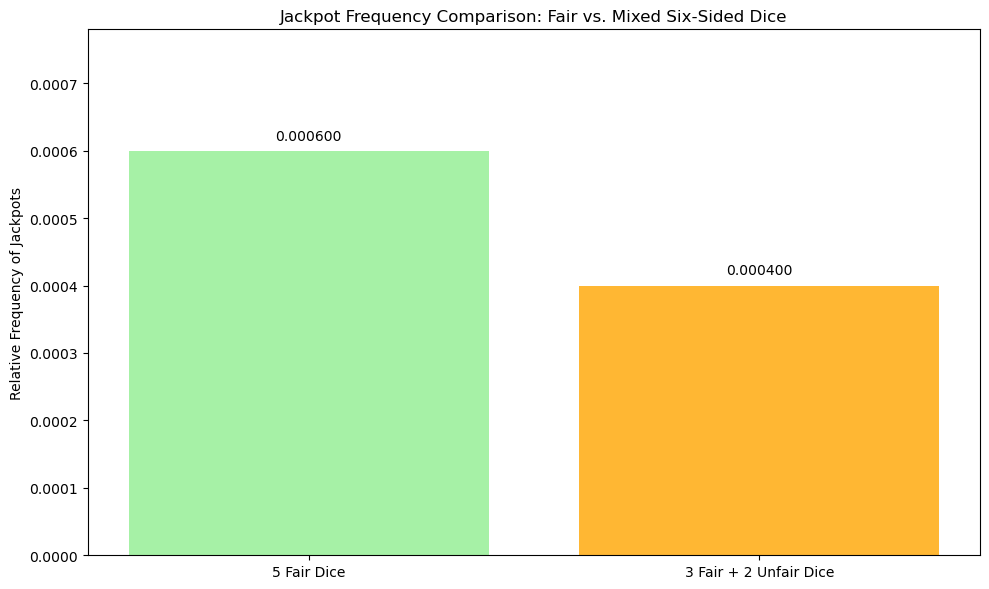


=== Face Count Analysis ===

Average face counts per roll (Fair dice):
Face Value
1    0.8339
2    0.8292
3    0.8435
4    0.8342
5    0.8333
6    0.8259
dtype: float64

Average face counts per roll (Mixed dice):
Face Value
1    1.0934
2    0.6895
3    0.6863
4    0.7079
5    0.7122
6    1.1107
dtype: float64


In [9]:
# Analyze both games
fair_dice_analyzer = Analyzer(fair_dice_game)
mixed_dice_analyzer = Analyzer(mixed_dice_game)

# Calculate jackpot statistics
fair_dice_jackpots = fair_dice_analyzer.jackpot()
mixed_dice_jackpots = mixed_dice_analyzer.jackpot()

fair_dice_relative = fair_dice_jackpots / len(fair_dice_game.show_results())
mixed_dice_relative = mixed_dice_jackpots / len(mixed_dice_game.show_results())

print(f"Fair dice game - Jackpots: {fair_dice_jackpots}, Relative frequency: {fair_dice_relative:.6f}")
print(f"Mixed dice game - Jackpots: {mixed_dice_jackpots}, Relative frequency: {mixed_dice_relative:.6f}")

# Visualize the comparison
plt.figure(figsize=(10, 6))
categories = ['5 Fair Dice', '3 Fair + 2 Unfair Dice']
frequencies = [fair_dice_relative, mixed_dice_relative]

bars = plt.bar(categories, frequencies, color=['lightgreen', 'orange'], alpha=0.8)
plt.ylabel('Relative Frequency of Jackpots')
plt.title('Jackpot Frequency Comparison: Fair vs. Mixed Six-Sided Dice')
plt.ylim(0, max(frequencies) * 1.3)

# Add value labels on bars
for bar, freq in zip(bars, frequencies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(frequencies) * 0.02, 
             f'{freq:.6f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Additional analysis: face count distribution
print("\n=== Face Count Analysis ===")
fair_face_counts = fair_dice_analyzer.face_count()
mixed_face_counts = mixed_dice_analyzer.face_count()

print("\nAverage face counts per roll (Fair dice):")
print(fair_face_counts.mean())
print("\nAverage face counts per roll (Mixed dice):")
print(mixed_face_counts.mean())

## Scenario 3: Letter-Based Word Generation

This scenario demonstrates a real-world application of Monte Carlo simulation by using English letter frequencies to generate random letter combinations and identify actual English words. This showcases how probability distributions can model natural phenomena.

### Creating a Letter Die Based on English Frequency

We'll create a die where each face represents a letter (A-Z) and the weights correspond to their frequency in English text.

In [10]:
# Load English letter frequencies
try:
    letter_data = pd.read_csv('english_letters.txt', sep=r'\s+', header=None, engine='python')
    print("English letter frequencies:")
    print(letter_data)
    
    # Create letter die with frequency-based weights
    letter_die = Die(np.array(letter_data[0]))
    
    # Apply frequency weights
    for i in range(len(letter_data)):
        letter_die.change_weight(letter_data.iloc[i, 0], float(letter_data.iloc[i, 1]))
    
    print("\nLetter die with frequency weights:")
    print(letter_die.show())
    
except FileNotFoundError:
    print("English letters file not found. Creating a simplified version...")
    # Fallback: create with common English letter frequencies
    letters = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 
               'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
    # Approximate English letter frequencies
    frequencies = [8.12, 1.49, 2.78, 4.25, 12.02, 2.23, 2.02, 6.09, 6.97, 0.15, 0.77, 4.03, 2.41,
                   6.75, 7.51, 1.93, 0.10, 5.99, 6.33, 9.06, 2.76, 0.98, 2.36, 0.15, 1.97, 0.07]
    
    letter_die = Die(np.array(letters))
    for letter, freq in zip(letters, frequencies):
        letter_die.change_weight(letter, freq)
    
    print("Letter die with approximate frequency weights:")
    print(letter_die.show().head(10))  # Show first 10 for brevity

English letter frequencies:
    0          1
0   E  529117365
1   T  390965105
2   A  374061888
3   O  326627740
4   I  320410057
5   N  313720540
6   S  294300210
7   R  277000841
8   H  216768975
9   L  183996130
10  D  169330528
11  C  138416451
12  U  117295780
13  M  110504544
14  F   95422055
15  G   91258980
16  P   90376747
17  W   79843664
18  Y   75294515
19  B   70195826
20  V   46337161
21  K   35373464
22  J    9613410
23  X    8369915
24  Z    4975847
25  Q    4550166

Letter die with frequency weights:
       weights
E  529117365.0
T  390965105.0
A  374061888.0
O  326627740.0
I  320410057.0
N  313720540.0
S  294300210.0
R  277000841.0
H  216768975.0
L  183996130.0
D  169330528.0
C  138416451.0
U  117295780.0
M  110504544.0
F   95422055.0
G   91258980.0
P   90376747.0
W   79843664.0
Y   75294515.0
B   70195826.0
V   46337161.0
K   35373464.0
J    9613410.0
X    8369915.0
Z    4975847.0
Q    4550166.0


### Simulation 1: Four-Letter Combinations

Let's simulate rolling four letter dice 1000 times and see how many actual English words we can generate.

In [11]:
# Play game with 4 letter dice
four_letter_game = Game([letter_die, letter_die, letter_die, letter_die])
four_letter_game.play(1000)

print("Sample 4-letter combinations:")
sample_results = four_letter_game.show_results('narrow').head(10)
for i, row in sample_results.iterrows():
    word = ''.join(row.values)
    print(f"Roll {i+1}: {word}")

Sample 4-letter combinations:
Roll 1: HTSO
Roll 2: IMHT
Roll 3: TCJL
Roll 4: URRN
Roll 5: RBCU
Roll 6: HLRH
Roll 7: LPAE
Roll 8: NROR
Roll 9: AYCE
Roll 10: GODW


### Word Validation Against English Dictionary

Now let's check how many of our generated permutations are actual English words using the Scrabble dictionary.

In [12]:
# Analyze permutations and find English words
four_letter_analyzer = Analyzer(four_letter_game)
four_letter_perms = four_letter_analyzer.perm_count()

print(f"Total unique 4-letter permutations generated: {len(four_letter_perms)}")
print("\nTop 10 most frequent permutations:")
print(four_letter_perms.head(10))

# Load English word dictionary
try:
    vocab = pd.read_csv('scrabble_words.txt', header=None)
    vocab_set = set(vocab[0].astype(str).str.upper())
    
    # Convert permutations to strings and check against dictionary
    perm_strings = [''.join(perm) for perm in four_letter_perms.index]
    valid_words = [word for word in perm_strings if word in vocab_set]
    
    print(f"\n=== 4-Letter Word Analysis ===")
    print(f"Valid English words found: {len(valid_words)}")
    print(f"Percentage of permutations that are words: {len(valid_words)/len(four_letter_perms)*100:.2f}%")
    
    if valid_words:
        print(f"\nSample valid words found: {valid_words[:10]}")
    
except FileNotFoundError:
    print("\nScrabble dictionary not found. Cannot validate words.")
    valid_words = []

Total unique 4-letter permutations generated: 987

Top 10 most frequent permutations:
         count
0 1 2 3       
E H R N      2
I E A N      2
T S S C      2
A H E A      2
S E T R      2
I A E E      2
N N N I      2
A H E O      2
N E E T      2
N T E H      2

=== 4-Letter Word Analysis ===
Valid English words found: 42
Percentage of permutations that are words: 4.26%

Sample valid words found: ['HEST', 'SETT', 'BEER', 'REAM', 'TINT', 'HISN', 'BONA', 'SITE', 'HAYS', 'EINE']


### Simulation 2: Five-Letter Combinations

Let's repeat the experiment with five-letter combinations and compare the results.

In [13]:
# Play game with 5 letter dice
five_letter_game = Game([letter_die, letter_die, letter_die, letter_die, letter_die])
five_letter_game.play(1000)

# Analyze permutations
five_letter_analyzer = Analyzer(five_letter_game)
five_letter_perms = five_letter_analyzer.perm_count()

print(f"Total unique 5-letter permutations generated: {len(five_letter_perms)}")
print("\nSample 5-letter combinations:")
sample_results = five_letter_game.show_results('narrow').head(10)
for i, row in sample_results.iterrows():
    word = ''.join(row.values)
    print(f"Roll {i+1}: {word}")

# Check for valid English words
if 'vocab_set' in locals():
    perm_strings_5 = [''.join(perm) for perm in five_letter_perms.index]
    valid_words_5 = [word for word in perm_strings_5 if word in vocab_set]
    
    print(f"\n=== 5-Letter Word Analysis ===")
    print(f"Valid English words found: {len(valid_words_5)}")
    print(f"Percentage of permutations that are words: {len(valid_words_5)/len(five_letter_perms)*100:.2f}%")
    
    if valid_words_5:
        print(f"\nSample valid words found: {valid_words_5[:10]}")
else:
    valid_words_5 = []
    print("\nCannot validate 5-letter words without dictionary.")

Total unique 5-letter permutations generated: 999

Sample 5-letter combinations:
Roll 1: DFOVO
Roll 2: GITEA
Roll 3: OARVS
Roll 4: ATCRS
Roll 5: LSSHN
Roll 6: SIEPL
Roll 7: HEWRB
Roll 8: AOWRK
Roll 9: KUONR
Roll 10: TYLME

=== 5-Letter Word Analysis ===
Valid English words found: 5
Percentage of permutations that are words: 0.50%

Sample valid words found: ['MURKS', 'TATAR', 'LOTAH', 'ARTIS', 'SUGAR']


### Comparative Analysis: 4-Letter vs 5-Letter Word Generation

Let's compare the effectiveness of 4-letter vs 5-letter combinations for generating English words.

=== Final Comparison ===
4-letter combinations: 42 valid words out of 987 permutations
5-letter combinations: 5 valid words out of 999 permutations

Result: 4-letter combinations
Difference: 37 more valid words


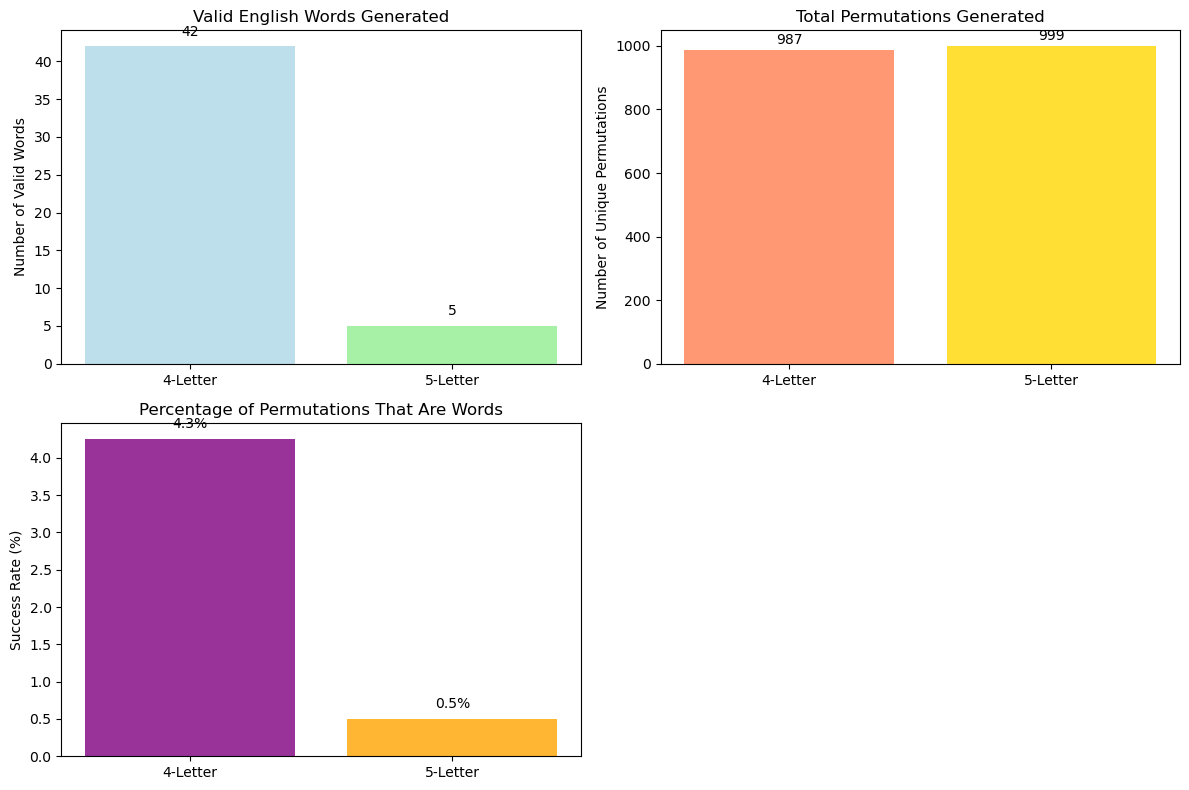


=== Key Insights ===
• 4-letter combinations have a 4.26% success rate
• 5-letter combinations have a 0.50% success rate
• The probability of generating valid words decreases with longer combinations
• This demonstrates how Monte Carlo simulation can model real-world language patterns


In [14]:
# Compare results
if 'valid_words' in locals() and 'valid_words_5' in locals():
    print("=== Final Comparison ===")
    print(f"4-letter combinations: {len(valid_words)} valid words out of {len(four_letter_perms)} permutations")
    print(f"5-letter combinations: {len(valid_words_5)} valid words out of {len(five_letter_perms)} permutations")
    
    # Determine which produces more words
    if len(valid_words) > len(valid_words_5):
        winner = "4-letter combinations"
        difference = len(valid_words) - len(valid_words_5)
    elif len(valid_words_5) > len(valid_words):
        winner = "5-letter combinations"
        difference = len(valid_words_5) - len(valid_words)
    else:
        winner = "Both produce equal results"
        difference = 0
    
    print(f"\nResult: {winner}")
    if difference > 0:
        print(f"Difference: {difference} more valid words")
    
    # Visualize the comparison
    plt.figure(figsize=(12, 8))
    
    # Subplot 1: Valid words comparison
    plt.subplot(2, 2, 1)
    categories = ['4-Letter', '5-Letter']
    word_counts = [len(valid_words), len(valid_words_5)]
    bars = plt.bar(categories, word_counts, color=['lightblue', 'lightgreen'], alpha=0.8)
    plt.ylabel('Number of Valid Words')
    plt.title('Valid English Words Generated')
    for bar, count in zip(bars, word_counts):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
                 str(count), ha='center', va='bottom')
    
    # Subplot 2: Total permutations comparison
    plt.subplot(2, 2, 2)
    perm_counts = [len(four_letter_perms), len(five_letter_perms)]
    bars = plt.bar(categories, perm_counts, color=['coral', 'gold'], alpha=0.8)
    plt.ylabel('Number of Unique Permutations')
    plt.title('Total Permutations Generated')
    for bar, count in zip(bars, perm_counts):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(perm_counts)*0.01, 
                 str(count), ha='center', va='bottom')
    
    # Subplot 3: Success rate (percentage of permutations that are words)
    plt.subplot(2, 2, 3)
    success_rates = [len(valid_words)/len(four_letter_perms)*100, 
                     len(valid_words_5)/len(five_letter_perms)*100]
    bars = plt.bar(categories, success_rates, color=['purple', 'orange'], alpha=0.8)
    plt.ylabel('Success Rate (%)')
    plt.title('Percentage of Permutations That Are Words')
    for bar, rate in zip(bars, success_rates):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1, 
                 f'{rate:.1f}%', ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()
    
    # Insights
    print("\n=== Key Insights ===")
    print(f"• 4-letter combinations have a {success_rates[0]:.2f}% success rate")
    print(f"• 5-letter combinations have a {success_rates[1]:.2f}% success rate")
    print(f"• The probability of generating valid words {'increases' if success_rates[1] > success_rates[0] else 'decreases'} with longer combinations")
    print(f"• This demonstrates how Monte Carlo simulation can model real-world language patterns")

else:
    print("Word validation requires the scrabble_words.txt dictionary file.")

## Conclusion

This notebook demonstrated the versatility and power of Monte Carlo simulation through three distinct scenarios:

1. **Coin Flipping**: Showed how weighted dice affect probability distributions and jackpot frequencies
2. **Six-Sided Dice**: Explored complex multi-die scenarios with various bias configurations
3. **Letter Generation**: Applied simulation to a real-world problem of modeling English language patterns

### Key Takeaways:

- **Bias Impact**: Weighted dice significantly alter outcome distributions and jackpot probabilities
- **Scale Effects**: Larger simulations (10,000 vs 1,000 rolls) provide more stable statistical estimates
- **Real-world Applications**: Monte Carlo methods can model natural phenomena like language patterns
- **Statistical Analysis**: The `Analyzer` class provides powerful tools for examining simulation results

The Monte Carlo simulator package successfully demonstrates fundamental concepts in probability theory, statistical analysis, and computational simulation methods.